In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_curve,auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('Train Data.csv')
validation_df = pd.read_csv('Validation Data.csv')
test_df = pd.read_csv('Test Data.csv')

In [4]:
train_df['has_ci'] = np.where(train_df['131366-0.0'].notna(), 1, 0)
train_df = train_df.drop('131366-0.0', axis=1)

validation_df['has_ci'] = np.where(validation_df['131366-0.0'].notna(), 1, 0)
validation_df = validation_df.drop('131366-0.0', axis=1)

test_df['has_ci'] = np.where(test_df['131366-0.0'].notna(), 1, 0)
test_df = test_df.drop('131366-0.0', axis=1)

In [5]:
x_train = train_df.drop('has_ci', axis=1)
y_train = train_df['has_ci']

x_validation = validation_df.drop('has_ci', axis=1)
y_validation = validation_df['has_ci']

x_test = test_df.drop('has_ci', axis=1)
y_test = test_df['has_ci']

In [6]:
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_prob_valid = rf_model.predict_proba(x_validation)[:,1]

In [27]:
threshold = 0.31
y_pred_valid = (y_prob_valid >= threshold).astype(int)

#evaluate the model
print('classification Report (Validation Set):')
print(classification_report(y_validation, y_pred_valid))

classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6297
           1       0.37      0.35      0.36      1593

    accuracy                           0.75      7890
   macro avg       0.60      0.60      0.60      7890
weighted avg       0.74      0.75      0.75      7890



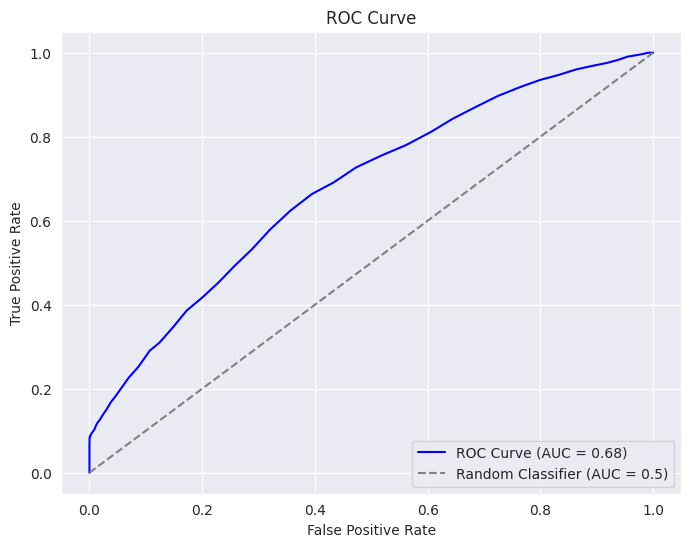

In [28]:
fpr,tpr,thresholds = roc_curve(y_validation, y_prob_valid)
roc_auc = auc(fpr,tpr)


#Print
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:

# Apply the selected threshold on the test set for final evaluation
y_prob_test = rf_model.predict_proba(x_test)[:, 1]
y_pred_test = (y_prob_test >= threshold).astype(int)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7847
           1       0.38      0.38      0.38      2014

    accuracy                           0.75      9861
   macro avg       0.61      0.61      0.61      9861
weighted avg       0.75      0.75      0.75      9861



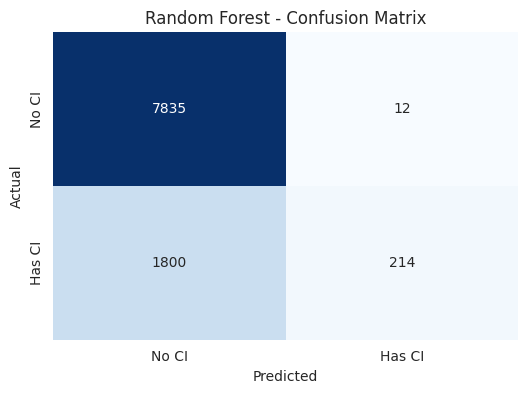

In [17]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Define custom labels
labels = ["No CI", "Has CI"]

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()